In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [2]:
#消除success的背景區域圖
csv_data = pd.read_csv('database2.csv')

In [3]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [4]:
'''
label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.067604,0.144930,0.195894,0.139601,0.109187,0.115964,0.105291,0.144114,0.101662,0.044503,...,0.118464,0.113335,0.258546,0.258546,0.258546,0.119759,0.223965,0.258546,0.172659,0
1,0.122304,0.186118,0.258400,0.149942,0.213387,0.122805,0.191628,0.068383,0.106367,0.125764,...,0.164379,0.087773,0.211230,0.159155,0.255840,0.075572,0.197187,0.166449,0.255840,0
2,0.096245,0.157364,0.274583,0.274583,0.179411,0.035995,0.034762,0.066208,0.060008,0.105648,...,0.124940,0.117372,0.119153,0.118998,0.128060,0.139923,0.215803,0.199235,0.143036,0
3,0.089704,0.128912,0.242266,0.130620,0.093848,0.096167,0.211394,0.149677,0.065260,0.161129,...,0.223295,0.144919,0.160136,0.184843,0.157746,0.094110,0.116322,0.117224,0.274690,0
4,0.234025,0.215182,0.201146,0.125925,0.177319,0.272684,0.100370,0.059686,0.104507,0.236746,...,0.127502,0.294867,0.294867,0.164168,0.081912,0.289939,0.274766,0.155836,0.132669,0
5,0.146419,0.148590,0.086042,0.135365,0.144399,0.152497,0.129191,0.087993,0.130120,0.125971,...,0.113782,0.137731,0.211333,0.196439,0.070817,0.029675,0.039129,0.123119,0.195112,0
6,0.083109,0.157988,0.300325,0.081161,0.082846,0.123722,0.208330,0.069954,0.061097,0.106571,...,0.057058,0.104018,0.274599,0.232656,0.129554,0.068000,0.126047,0.206140,0.017293,0
7,0.103078,0.241545,0.159545,0.072584,0.098725,0.176691,0.231571,0.126916,0.093432,0.150650,...,0.257317,0.263347,0.243412,0.184728,0.148344,0.142616,0.226459,0.153660,0.192521,0
8,0.102061,0.227360,0.198387,0.084566,0.142908,0.114095,0.235825,0.226376,0.157392,0.129953,...,0.214287,0.206422,0.233289,0.115737,0.094394,0.078473,0.120086,0.249665,0.191117,0
9,0.229398,0.164536,0.144636,0.183432,0.145382,0.117053,0.148869,0.123298,0.101762,0.192967,...,0.087367,0.186746,0.224256,0.139866,0.171240,0.106210,0.232804,0.249097,0.123853,0


In [5]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.067604,0.144930,0.195894,0.139601,0.109187,0.115964,0.105291,0.144114,0.101662,0.044503,...,0.118464,0.113335,0.258546,0.258546,0.258546,0.119759,0.223965,0.258546,0.172659,0
1,0.122304,0.186118,0.258400,0.149942,0.213387,0.122805,0.191628,0.068383,0.106367,0.125764,...,0.164379,0.087773,0.211230,0.159155,0.255840,0.075572,0.197187,0.166449,0.255840,0
2,0.096245,0.157364,0.274583,0.274583,0.179411,0.035995,0.034762,0.066208,0.060008,0.105648,...,0.124940,0.117372,0.119153,0.118998,0.128060,0.139923,0.215803,0.199235,0.143036,0
3,0.089704,0.128912,0.242266,0.130620,0.093848,0.096167,0.211394,0.149677,0.065260,0.161129,...,0.223295,0.144919,0.160136,0.184843,0.157746,0.094110,0.116322,0.117224,0.274690,0
4,0.234025,0.215182,0.201146,0.125925,0.177319,0.272684,0.100370,0.059686,0.104507,0.236746,...,0.127502,0.294867,0.294867,0.164168,0.081912,0.289939,0.274766,0.155836,0.132669,0
5,0.146419,0.148590,0.086042,0.135365,0.144399,0.152497,0.129191,0.087993,0.130120,0.125971,...,0.113782,0.137731,0.211333,0.196439,0.070817,0.029675,0.039129,0.123119,0.195112,0
6,0.083109,0.157988,0.300325,0.081161,0.082846,0.123722,0.208330,0.069954,0.061097,0.106571,...,0.057058,0.104018,0.274599,0.232656,0.129554,0.068000,0.126047,0.206140,0.017293,0
7,0.103078,0.241545,0.159545,0.072584,0.098725,0.176691,0.231571,0.126916,0.093432,0.150650,...,0.257317,0.263347,0.243412,0.184728,0.148344,0.142616,0.226459,0.153660,0.192521,0
8,0.102061,0.227360,0.198387,0.084566,0.142908,0.114095,0.235825,0.226376,0.157392,0.129953,...,0.214287,0.206422,0.233289,0.115737,0.094394,0.078473,0.120086,0.249665,0.191117,0
9,0.229398,0.164536,0.144636,0.183432,0.145382,0.117053,0.148869,0.123298,0.101762,0.192967,...,0.087367,0.186746,0.224256,0.139866,0.171240,0.106210,0.232804,0.249097,0.123853,0


In [6]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
count,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,...,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000
mean,0.120554,0.131438,0.146897,0.124219,0.136857,0.124195,0.131570,0.116133,0.114514,0.134502,...,0.147640,0.159943,0.176556,0.149425,0.163484,0.148036,0.175751,0.161983,0.152097,0.687612
std,0.079369,0.080482,0.090901,0.069945,0.078081,0.073626,0.076451,0.070053,0.073133,0.081886,...,0.078646,0.089039,0.095431,0.080666,0.087908,0.080014,0.091440,0.083842,0.078685,0.680469
min,0.000601,0.000395,0.000152,0.000000,0.000517,0.000000,0.000000,0.000019,0.000023,0.000501,...,0.000864,0.000057,0.000168,0.000076,0.000514,0.000000,0.000208,0.000197,0.000790,0.000000
25%,0.066248,0.073234,0.083377,0.073224,0.083037,0.070165,0.074150,0.062724,0.063480,0.075909,...,0.089760,0.092209,0.105682,0.088229,0.100684,0.087042,0.105788,0.097800,0.094685,0.000000
50%,0.103585,0.117081,0.130513,0.113067,0.125057,0.112526,0.124016,0.108238,0.101054,0.117822,...,0.137327,0.150141,0.166924,0.140596,0.154825,0.139149,0.170485,0.155728,0.143487,1.000000
75%,0.151484,0.174612,0.192853,0.163551,0.173107,0.163446,0.178527,0.157537,0.146892,0.173463,...,0.196884,0.220230,0.242795,0.202675,0.216934,0.201213,0.243721,0.221583,0.200842,1.000000
max,0.563845,0.513437,0.558815,0.512230,0.495193,0.446889,0.453142,0.453142,0.472206,0.563845,...,0.474600,0.463546,0.514231,0.533870,0.682914,0.505416,0.521915,0.486406,0.509328,2.000000


In [7]:
csv_data.std()  #使用std()函數可以求得DataFrame對象每一列的標準差

0        0.079369
1        0.080482
2        0.090901
3        0.069945
4        0.078081
5        0.073626
6        0.076451
7        0.070053
8        0.073133
9        0.081886
10       0.080322
11       0.089022
12       0.073978
13       0.082242
14       0.078449
15       0.089695
16       0.081651
17       0.078624
18       0.077102
19       0.086367
20       0.096388
21       0.079980
22       0.088108
23       0.074997
24       0.081958
25       0.076321
26       0.076947
27       0.079717
28       0.085900
29       0.093649
           ...   
115      0.071692
116      0.079101
117      0.082787
118      0.083154
119      0.092419
120      0.075181
121      0.083705
122      0.074809
123      0.086520
124      0.079520
125      0.083088
126      0.074696
127      0.082995
128      0.089835
129      0.077014
130      0.084041
131      0.072383
132      0.083592
133      0.076856
134      0.074326
135      0.078646
136      0.089039
137      0.095431
138      0.080666
139      0

###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [14]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo') 
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [15]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [16]:
accuracies  #五個模型的準確度

[0.63178740258081,
 0.6326817426855755,
 0.6319151654529194,
 0.6357480516162003,
 0.6340403782264248]

In [17]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))
print("標準差 = {:f}".format(np.std(acc)))

平均值 = 0.633235
標準差 = 0.001490


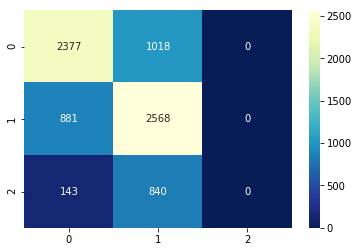

In [18]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")

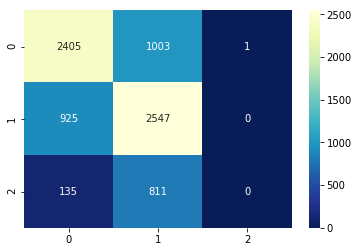

In [19]:
sns.heatmap(confmats[1], cmap="YlGnBu_r", annot=True, fmt="d")

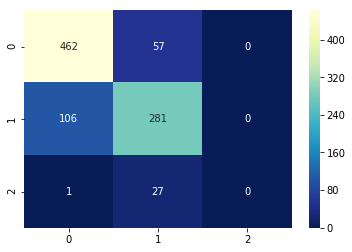

In [49]:
sns.heatmap(confmats[2], cmap="YlGnBu_r", annot=True, fmt="d")

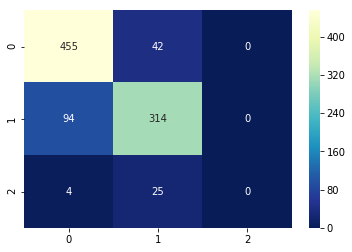

In [50]:
sns.heatmap(confmats[3], cmap="YlGnBu_r", annot=True, fmt="d")

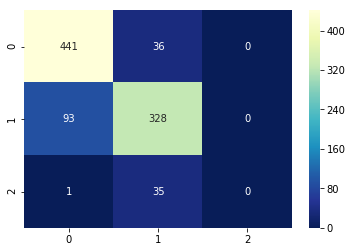

In [51]:
sns.heatmap(confmats[4], cmap="YlGnBu_r", annot=True, fmt="d")